In [1]:
import numpy as np

from ssvqe import *

from qiskit_ibm_runtime import QiskitRuntimeService

import matplotlib.pyplot as plt

In [2]:
def txt_output(lab: SSVQE, file_title: str, idx: int):

    callback_dict = lab.get_callback_dict()

    with open(file=file_title+"_{:0>3d}.txt".format(idx), mode='xt', encoding='UTF-8') as file:
        print(file_title+"_{:0>3d} callback: \n".format(idx), file=file)
        print("-------------------------------------------------", file=file)
        print("Backend: {}\n".format(lab.get_backend()), file=file)
        print("-------------------------------------------------", file=file)
        print("Hamiltonian =\n{}\n".format(lab.hamiltonian), file=file)
        print("Initial guess:\n{}\n".format(lab.initial_guess), file=file)
        print("Weighting: {}\n".format(lab.weighting), file=file)
        print("Number of layers: {}\n".format(lab.get_num_layers()), file=file)
        print("Initial parameters: {}\n".format(lab.get_initial_parameters()), file=file)
        print("-------------------------------------------------", file=file)
        print("Cost history:\n{}\n".format(callback_dict["cost_history"]), file=file)
        print("-------------------------------------------------", file=file)
        print("Energies history:\n{}\n".format(callback_dict["energies_history"]), file=file)
        print("-------------------------------------------------", file=file)
        print("Final_parameters: {}\n".format(callback_dict["prev_params"]), file=file)

In [3]:
def png_output(lab: SSVQE, file_title: str, idx: int):

    callback_dict = lab.get_callback_dict()

    energies = []
    for i in range(lab.num_states):
        jth_energy = []
        for j in range(len(callback_dict["energies_history"])):
            jth_energy.append(callback_dict["energies_history"][j][i])
        energies.append(jth_energy)
        
    print("Final energy outcomes:", callback_dict["energies_history"][-1])

    # true_energies = [-2, 0, 0, 2] # cyclobutadiene
    true_energies = [-1.618, -0.618, 0.618, 1.618] # 1,3-butadiene

    fig, ax = plt.subplots(1, 1, figsize=(7,5))
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
    [ax.plot(range(callback_dict["iters"]), energies[i], color=colors[i], label=np.binary_repr(i, lab.num_qubits)) for i in range(lab.num_states)]
    [ax.plot(range(callback_dict["iters"]), np.zeros(callback_dict["iters"]) + true_energies[i], '--', color=colors[i]) for i in range(lab.num_states)]
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Energy")

    '''
    # cyclobutadiene
    y_ticks = [2.0, 1.0, 0, -1.0, -2.0]
    y_tick_labels = [
        r"$\alpha - 2.0\beta$", r"$\alpha - 1.0\beta$",
        r"$\alpha + 0.0\beta$", r"$\alpha + 1.0\beta$", r"$\alpha + 2.0\beta$"
    ]
    '''

    # 1,3-butadiene
    y_ticks = [1.5, 1.0, 0.5, 0, -0.5, -1.0, -1.5]
    y_tick_labels = [
        r"$\alpha - 1.5\beta$", r"$\alpha - 1.0\beta$", r"$\alpha - 0.5\beta$",
        r"$\alpha + 0.0\beta$", r"$\alpha + 0.5\beta$", r"$\alpha + 1.0\beta$", r"$\alpha - 1.5\beta$"
    ]
    ax.set_yticks(y_ticks ,y_tick_labels)
    ax.legend(loc="lower left", bbox_to_anchor=(0, 0))

    plt.savefig(file_title+"_{:0>3d}.png".format(idx), bbox_inches='tight')

In [4]:
# must be hermitian
hamiltonian = np.asarray([[ 0, -1,  0,  0],
                          [-1,  0, -1,  0],
                          [ 0, -1,  0, -1],
                          [ 0,  0, -1,  0]])

# must be ubitary

initial_guess = 0.5 * np.asarray([[ 1,  1,  1,  1],
                                  [ 1,  1, -1, -1],
                                  [ 1, -1, -1,  1],
                                  [ 1, -1,  1, -1]])
'''
initial_guess = np.asarray([[ 1,  0,  0,  0],
                            [ 0,  1,  0,  0],
                            [ 0,  0,  1,  0],
                            [ 0,  0,  0,  1]])
'''

weighting = [4, 3, 2, 1]

Iters. done: 1 [Current cost: -4.7627999999999995]
Iters. done: 2 [Current cost: -2.5379000000000005]
Iters. done: 3 [Current cost: -4.3855]
Iters. done: 4 [Current cost: -2.5096]
Iters. done: 5 [Current cost: -4.6487]
Iters. done: 6 [Current cost: -2.6454999999999997]
Iters. done: 7 [Current cost: -4.385]
Iters. done: 8 [Current cost: 0.21059999999999995]
Iters. done: 9 [Current cost: -3.3002000000000002]
Iters. done: 10 [Current cost: -4.720300000000001]
Iters. done: 11 [Current cost: -4.7570000000000014]
Iters. done: 12 [Current cost: -4.6602]
Iters. done: 13 [Current cost: -4.500200000000001]
Iters. done: 14 [Current cost: -4.7651]
Iters. done: 15 [Current cost: -4.8233999999999995]
Iters. done: 16 [Current cost: -5.1782]
Iters. done: 17 [Current cost: -5.0844]
Iters. done: 18 [Current cost: -5.215999999999999]
Iters. done: 19 [Current cost: -5.1922]
Iters. done: 20 [Current cost: -5.1652]
Iters. done: 21 [Current cost: -5.1449]
Iters. done: 22 [Current cost: -5.1525]
Iters. done: 

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

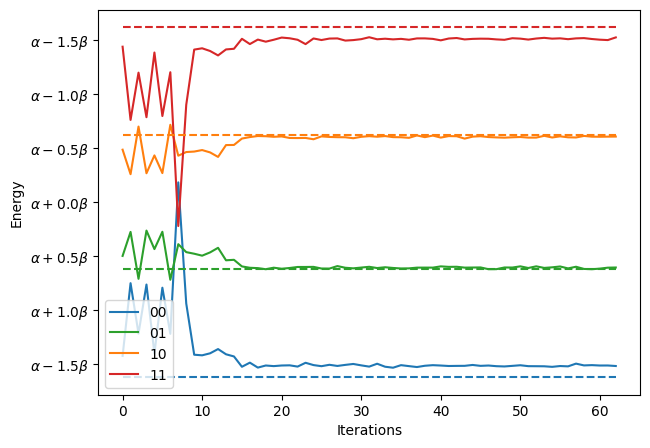

In [5]:
num_trials = 2
file_title = "aer_sherbrooke_L2_WithInitialGuess"

for trial_idx in range(4, num_trials+4):

    lab = SSVQE(hamiltonian=hamiltonian, initial_guess=initial_guess, weighting=weighting)
    
    lab.execute(num_layers=2, initial_parameters_mode='zeros', backend='ibm_sherbrooke') #num_layers can only be even

    txt_output(lab=lab, file_title=file_title, idx=trial_idx)
    png_output(lab=lab, file_title=file_title, idx=trial_idx)